In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (10, 2)

In [2]:
# если клетка падает, то просто перезапусти
from notmnist import load_notmnist


X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print(f"Train size  = {len(X_train):11}, test_size  = {len(X_test)}")
print(f"Train shape = {X_train.shape}, test_shape = {X_test.shape:}")

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if &lt;10 images are broken]
Done
Train size  =        2808, test_size  = 937
Train shape = (2808, 784), test_shape = (937, 784)


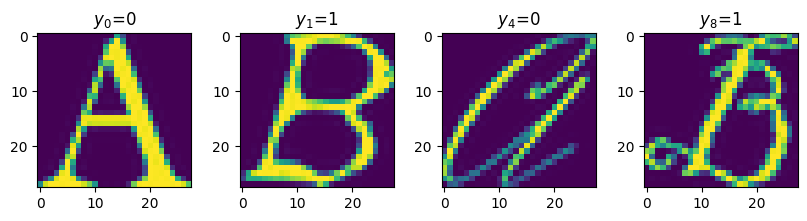

In [185]:
indeces = [0, 1, 4, 8]
for i, ind in enumerate(indeces):
    plt.subplot(1, len(indeces), i + 1)
    plt.imshow(X_train[ind].reshape([28, 28]))
    plt.title(f'$y_{ind}$=' + str(y_train[ind]))

Загруженный датасет -- это картинки 28 на 28 с рукописными буквами А и В.

Нужно написать на торче классификатор, который умеет отличать одну букву от другой, то есть решить задачу бинарной классификации. Классификатор для буквы А должен выдавать 0, для B -- 1.

# Пишем Классификатор на Ручных Правилах

Для начала предлагаю тебе
- забыть обучающую выборку и придумать нейронный классификатор "из головы"
- заимплементить его,
- посчитать качество на валидации.

На классификатор есть ограничение: он должен состоять только из линейных функций.

In [186]:
import torch

class Layer():
    """
    Общий класс для слоя нейронной сети. 
    """
    def __init__(self):
        pass
    
    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Прямое применение слоя ко входным данным
        """
        return input

Для начала создадим слой, который выделяет штрихи, специфичные для буквы B:

In [ ]:
class IlyaLayer1(Layer):
    """
    Первый слой нейронной сети Ильи
    """
    def __init__(self):
        ### <YOUR CODE HERE> ###
        pass
    
    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Применение первого слоя сети Ильи к входной картинке input (784,)
        """
        ### <YOUR CODE HERE> ###
        return ?


layer1 = IlyaLayer1()

plt.imshow(layer1.weights.reshape([28, 28]));
plt.title('layer1.weights')

Теперь мы можем взять случайный пример из тестовой выборки и применить наш линейный слой с одним выходом:

x shape =  torch.Size([784])


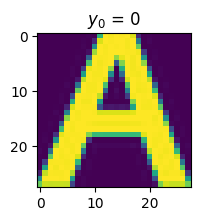

In [208]:
test_ind = 0

x = torch.tensor(X_test[test_ind])

print("x shape = ", x.shape)
plt.imshow(x.reshape([28, 28]))
plt.title(f'$y_{test_ind}$ = ' + str(y_test[test_ind]));

In [ ]:
activations1 = layer1.forward(x)

plt.subplot(1, 4, 1)
plt.imshow(x.reshape([28, 28]))
plt.title('Входная картинка')

plt.subplot(1, 4, 2)
plt.imshow(layer1.weights.reshape([28, 28]))
plt.title('Веса слоя')

plt.subplot(1, 4, 3)
plt.imshow((x * layer1.weights).reshape([28, 28]))
plt.title('Картинка * веса')

plt.subplot(1, 4, 4)
plt.imshow(activations1.reshape(1, 1))
plt.title('Активации')

print('Результат применения 1-ого слоя (активации):', activations1)
print('Размерность активаций                      :', activations1.shape)

Скорее всего к этому моменту ты придумал **линейную регресиию**. Поздравляю!

Давай вспомним, что мы решаем задачу классификации, и на выходе мы хотим получить **вероятность того, что на картинке буква B**, то есть что-то в промежутке $[0, 1]$.

Для **превращения регрессора в классификатор** проделаем два шага:

**Шаг 1**

- попробуй модифицировать первый слой так, чтобы активация >= 0 означала класс 1, а активация < 0 означала класс 0.

In [ ]:
activations1_wo_bias = x.dot(layer1.weights)
activations1 = layer1.forward(x)

print('Результат применения 1-ого слоя без bias:', activations1_wo_bias)
print('Результат применения 1-ого слоя c bias  :', activations1)

**Шаг 2**

- сделаем из активаций первогой слоя что-то между $0$ и $1$, для этого введем новый слой:

In [190]:
class IlyaLastLayer(Layer):
    """
    Последний слой нейронной сети Ильи
    """
    def __init__(self):
        ### <YOUR CODE HERE> ###
#         pass
    
    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Применение последнео слоя сети Ильи к выходу предыдущих слоев (1,).
        Выдает один выход (1,), который означает вероятность буквы B на картинке.
        """
        ### <YOUR CODE HERE> ###
        return ?


last_layer = IlyaLastLayer()

In [ ]:
activations1 = layer1.forward(x)
pred_probas = last_layer.forward(activations1)

plt.figure(figsize=(10, 5))

plt.subplot(2, 4, 1)
plt.imshow(x.reshape([28, 28]))
plt.title('Входная картинка')

plt.subplot(2, 4, 2)
plt.imshow(layer1.weights.reshape([28, 28]))
plt.title('Веса слоя 1')

plt.subplot(2, 4, 3)
plt.imshow((x * layer1.weights).reshape([28, 28]))
plt.title('Картинка * веса1')

plt.subplot(2, 4, 4)
plt.imshow(activations1.reshape(1, 1))
plt.title('Активации1')

plt.subplot(2, 4, 5)
plt.imshow(pred_probas.reshape(1, 1))
plt.title('Вероятность')

print('Результат применения 1-ого слоя (активации)       :', activations1)
print('Размерность активаций1                            :', activations1.shape)

print('Результат применения последнего слоя (вероятности):', pred_probas)

Круто! А это была **логистическая регрессия** (которая решает задачу совсем не регрессии, а классификации).

Можем собрать наш классификатор в один класс:

In [206]:
class IlyaNetwork(Layer):
    """
    Класс для нашей нейронной сети
    """
    def __init__(self):
        self.layer1 = IlyaLayer1()
        self.last_layer = IlyaLastLayer()
    
    def forward(self, input: torch.Tensor) -> torch.Tensor:
        """
        Применение слоев сети в входной картинке input
        """
        output1 = self.layer1.forward(input)
        pred_probas = self.last_layer.forward(output1)
        return pred_probas
   

network = IlyaNetwork()
network.forward(x)

tensor(1.0000)

Стоит посчитать его качество на вылидационной выборке:

### Качество на Валидации

In [ ]:
def accuracy(predictions: torch.Tensor, targets: torch.Tensor, threshold: float = 0.5):
    """точность предсказаний - доля верных ответов"""
    ### <YOUR CODE HERE> ###
#     return ?

In [238]:
predictions = torch.empty(len(X_test))
for i, x in enumerate(X_test):
    x_tensor = torch.tensor(x)
    predictions[i] = network.forward(x_tensor)
    
y_test_tensor = torch.tensor(y_test)
acc = accuracy(predictions, y_test_tensor)
print(f"Мы угадываем правильный класс картинки в {acc*100:.5}% случаев на валидационной выборке.")

Мы угадываем правильный класс картинки в 81.11% случаев на валидационной выборке.


### Оптимизируем с Помощью Мини-Батчей

Давайте ускорим код, отвечающий за получения предсказаний и подсчет метрик. Если приглядеться в предыдущий кусок кода, то мы каждую картинку по отдельности пропускаем через сетку и получаем выход сети. Но намного быстрее будет пропустить через сеть сразу несколько примеров. Такая групка примеров называется мини-батчем (mini-batch), или иногда называются просто батчом.

**Задание** Перепиши классы выше так, чтобы они могли принимать сразу мини-батч примеров и без помощи for-loops (то есть векторно) получали предсказание. 

Теперь мы можем получать предсказания быстрее (посчитайте качество, получив предсказания мини-батчами):

In [240]:
from typing import Iterator, Tuple
from tqdm.auto import trange


def iterate_minibatches(inputs: np.ndarray, targets: np.ndarray, batch_size: int, shuffle: bool = False) \
        -> Iterator[Tuple[np.ndarray]]:
    """
    Проходимся по датасету мини-батчами 
    """
    assert len(inputs) == len(targets)
    
    if shuffle:
        indices = np.random.permutation(len(inputs))
        
    for start_idx in trange(0, len(inputs) - batch_size + 1, batch_size):
        if shuffle:
            excerpt = indices[start_idx: start_idx + batch_size]
        else:
            excerpt = slice(start_idx, start_idx + batch_size)
        yield inputs[excerpt], targets[excerpt]

In [238]:
### <YOUR CODE HERE> ###
    
acc = ?
print(f"Мы угадываем правильный класс картинки в {acc*100:.5}% случаев на валидационной выборке.")

Мы угадываем правильный класс картинки в 81.11% случаев на валидационной выборке.


### Усложняем модель

Пока мы построили руками простую линейную регрессию. Мы нашли один характерный паттерн пикселей для символа B. Давай попробуем придумать еще один паттерн для буквы B, и на основе активаций двух паттернов будем решать, какой изображен символ.

_Важное условие:_ В качестве строительного материаламожно использовать только дифференцируемые функции (иногда torch потом не сумеет нам аналитически посчитать градиент). Например, это все функции без использования оператора `if` и без циклов.

Чтобы сделать функцию предсказания сложнее, обычно добавляют следующие нелинейные функции (функции активации):

![Функции активации](https://www.researchgate.net/profile/Junxi-Feng/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU.ppm)

In [ ]:
class ReLU(Layer):    
    def forward(self, x):
        """f(x) = max(x)"""
        return ?

### Качество на Валидации